In [7]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# fetch dataset 
bone_marrow_transplant_children = fetch_ucirepo(id=565) 
  
# data (as pandas dataframes) 
x = bone_marrow_transplant_children.data.features 
y = bone_marrow_transplant_children.data.targets 

# metadata 
print(bone_marrow_transplant_children.metadata) 
  
# variable information 
print(bone_marrow_transplant_children.variables) 


{'uci_id': 565, 'name': 'Bone marrow transplant: children', 'repository_url': 'https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children', 'data_url': 'https://archive.ics.uci.edu/static/public/565/data.csv', 'abstract': 'The data set describes pediatric patients with several hematologic diseases, who were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 187, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Gender', 'Age'], 'target_col': ['survival_status'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5NP6Z', 'creators': ['Marek Sikora', 'Łukasz Wróbel', 'Adam Gudyś'], 'intro_paper': {'ID': 293, 'type': 'NATIVE', 'title': 'GuideR: a guided se

In [ ]:

df=pd.DataFrame(x)
print("columns" ,df.columns)
print("shape",df.shape)

x = df.copy()
y = pd.Series(y)


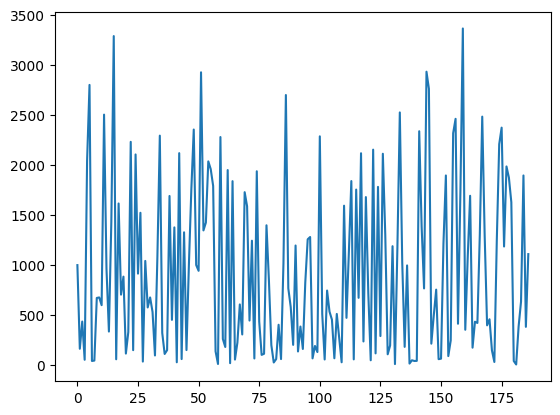

In [10]:
plt.plot(x["survival_time"])

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



print(f"Train : {x_train.shape}, y_train={y_train.shape}")

Train : (149, 36), y_train=(149, 1)


In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    int64  
 1   Stemcellsource        187 non-null    int64  
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    int64  
 4   IIIV                  187 non-null    int64  
 5   Gendermatch           187 non-null    int64  
 6   DonorABO              187 non-null    int64  
 7   RecipientABO          186 non-null    float64
 8   RecipientRh           185 non-null    float64
 9   ABOmatch              186 non-null    float64
 10  CMVstatus             171 non-null    float64
 11  DonorCMV              185 non-null    float64
 12  RecipientCMV          173 non-null    float64
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    int64  
 15  Txpostrelapse         1

In [14]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

models={
    "Random Forest":RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost":XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'),
    "SVM":SVC(kernel="linear",probability=True)

}

for name, model in models.items():
    model.fit(x_train,y_train)
    print(f"{name} entraine avec succes")


ValueError: could not convert string to float: 'ALL'